## 7.3. Performans Olcum Metrikleri - Odev

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Titanic verilerini Kaggle'dan indirin. Buradaki train.csv dosyasındaki veriler ihtiyacınızı görecektir.

titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(titanic.shape)

(891, 12)


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic = titanic.drop(['Cabin'], axis=1)

In [6]:
titanic = titanic.dropna()

In [7]:
print(titanic.shape)

(712, 11)


In [8]:
titanic['Sex'] = titanic.Sex.replace({'female':1, 'male':0})

In [10]:
# Bir onceki odevde kullandigim ilk model uzerinden ilerleyecegim

X = titanic[['Age','Sex','Pclass']]
Y = titanic.Survived

X_egitim,X_test,Y_egitim,Y_test = train_test_split (X,Y,test_size=0.20,random_state=111)

titanic_tahmin_modeli = LogisticRegression()
titanic_tahmin_modeli.fit(X_egitim, Y_egitim)

tahmin_egitim = titanic_tahmin_modeli.predict(X_egitim)
tahmin_test = titanic_tahmin_modeli.predict(X_test)

In [11]:
tahmin_test_ihtimal = titanic_tahmin_modeli.predict_proba(X_test)[:,1]

In [13]:
hata_matrisi_egitim = confusion_matrix(Y_egitim,tahmin_egitim)
hata_matrisi_test = confusion_matrix(Y_test,tahmin_test)

In [14]:
print("Hata Matrisi (Egitim verileri)", "-"*30, hata_matrisi_egitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Egitim verileri)
------------------------------
[[293  53]
 [ 63 160]]
Hata Matrisi (Test verileri)
------------------------------
[[70  8]
 [22 43]]


In [15]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Dogru negatif sayısı   :", TN)
print("Dogru pozitif sayısı   :", TP)
print("Yanlıs pozitif sayısı  :", FP)
print("Yanlıs negatif sayısı  :", FN)

Dogru negatif sayısı   : 70
Dogru pozitif sayısı   : 43
Yanlıs pozitif sayısı  : 8
Yanlıs negatif sayısı  : 22


In [18]:
# 1. Dogruluk

from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  titanic_tahmin_modeli.score(X_test, Y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(Y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.7902097902097902
Hesaplanan doğruluk değeri      :  0.7902097902097902
accuracy_score() değeri         :  0.7902097902097902


In [19]:
# 2. Hata

# Hata orani = 1-dogruluk = 1 - 0.79 = 0.21

In [21]:
# 3. Hassasiyet

from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(Y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.8431372549019608
precision_score() değeri        :  0.8431372549019608


In [22]:
# 4. Duyarlilik

from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(Y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.6615384615384615
recall_score() değeri        :  0.6615384615384615


In [23]:
# 5. Ozgunluk

print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.8974358974358975


In [24]:
# 6. F1 Skoru

from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(Y_test, tahmin_test)
duyarlılık_değeri = recall_score(Y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(Y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.7413793103448276
f1_score() değeri     :  0.7413793103448276


In [25]:
# ROC Egrisi

titanic_test_ihtimal = titanic_tahmin_modeli.predict_proba(X_test)[:,1]

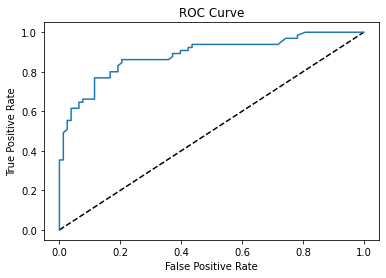

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(Y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [27]:
print('AUC Değeri : ', roc_auc_score(Y_test, tahmin_test_ihtimal))

AUC Değeri :  0.8841222879684418


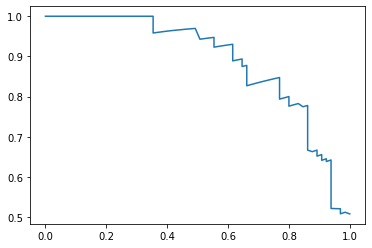

In [28]:
# Hassasiyet Egrisi

from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(Y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()